##  Part 1: Prepare Data

In [1]:
import sys
sys.path.append('E:\\git_folder\\quant_models')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os

import random
import matplotlib.pylab as plt

In [2]:
import pandas as pd
from util.utils import get_daily_vol, sample_df, filter_df_time
data_fn = "././data/CNA_portfolio.csv"
df_pnl = pd.read_csv(data_fn)
test_df = df_pnl.copy()
test_df.rename(columns={'Date':'datetime'}, inplace=True)
test_df.loc[:,'datetime'] = pd.to_datetime(test_df.datetime)
test_df.set_index('datetime', inplace=True)
print(test_df.head(2))

000002 SZ T1440  000089 SZ T1440  000157 SZ T1440  \
datetime                                                        
2012-01-05         5.608798         3.807883         5.697452   
2012-01-06         5.480905         3.801978         5.567221   
2012-01-07         5.527596         3.890607         5.758363   
2012-01-08         5.527596         3.890607         5.758363   
2012-01-09         5.527596         3.890607         5.758363   

            000568 SZ T1440  000581 SZ T1440  000651 SZ T1440  \
datetime                                                        
2012-01-05        26.510463        17.259812         6.377904   
2012-01-06        26.828842        16.993895         6.197429   
2012-01-07        26.616697        16.451072         6.366991   
2012-01-08        26.616697        16.451072         6.366991   
2012-01-09        26.616697        16.451072         6.366991   

            000858 SZ T1440  000951 SZ T1440  000997 SZ T1440  \
datetime                           

##  Part 2: Apply the portfolio adjusting method

In [8]:
from portfolio.optimize import HRPOpt

In [9]:
from portfolio.environment import EquityEnvironment

In [10]:
N_ASSETS = 65 # 53
WINDOW_FIT = 50
WINDOW_HOLD = 10

In [6]:
hrp_algo = HRPOpt(N_ASSETS, allow_short=False)
env = EquityEnvironment(test_df)

In [7]:
result_equal, result_hrp = [],  [] 
actions_equal, actions_hrp = [], []
for i in range(WINDOW_FIT, len(test_df), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_hrp = hrp_algo.act(state)
    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    r = np.dot(state_action, action_hrp)
    result_hrp.append(r.tolist())
    actions_hrp.append(action_hrp)

E:\git_folder\quant_models\portfolio\_hrpfuncs.py:72: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, 'single')
E:\git_folder\quant_models\portfolio\_hrpfuncs.py:72: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, 'single')
E:\git_folder\quant_models\portfolio\_hrpfuncs.py:72: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, 'single')
E:\git_folder\quant_models\portfolio\_hrpfuncs.py:72: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, 'single')
E:\git_folder\quant_models\portfolio\_hrpfuncs.py:72: ClusterWarning: scipy.cluster: The symmetr

ValueError: The condensed distance matrix must contain only finite values.

##  Part 3: Visualizing the Results of Portofolio

In [11]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_hrp_vis = [item for sublist in result_hrp for item in sublist]

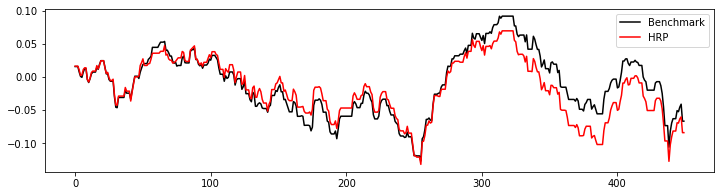

In [12]:
plt.figure(figsize = (12, 3))
plt.plot(np.array(result_equal_vis).cumsum(), label = 'Benchmark', color = 'black')
plt.plot(np.array(result_hrp_vis).cumsum(), label = 'HRP', color = 'red')
# plt.plot(np.array(result_smooth_vis).cumsum(), label = 'Forecasting', color = 'blue')
plt.legend()
plt.show()

In [13]:
from util.metrics import sharpe_iid
print(sharpe_iid(np.array(result_equal_vis), factor=255, log=False))
print(sharpe_iid(np.array(result_hrp_vis), factor=255, log=False))


-0.36156201752142625
-0.4252720427298954


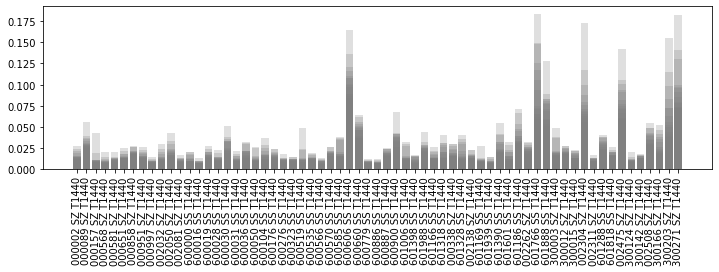

In [14]:
plt.figure(figsize = (12, 3))
for a in actions_hrp:    
    plt.bar(np.arange(N_ASSETS), a, color = 'grey', alpha = 0.25)
    plt.xticks(np.arange(N_ASSETS), env.data.columns, rotation='vertical')
plt.show()